In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

--2020-08-24 14:36:46--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.8MB/s    in 11s     

2020-08-24 14:36:58 (14.9 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

In [ ]:
data = unpickle('cifar-10-batches-py/data_batch_1')
print(data.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
X = data[b'data']
y = np.array(data[b'labels'])

In [ ]:
X = X / 255

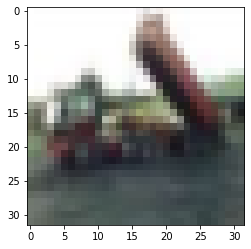

In [ ]:
img = X[2].reshape(3, 32, 32).transpose([1, 2, 0])

plt.imshow(img)

0.03700924813215141


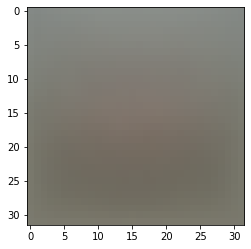

In [ ]:
from sklearn.decomposition import PCA as DR

dr = DR(n_components=2)
X_2d = dr.fit_transform(X)
X_recons = dr.inverse_transform(X_2d)

print(np.mean((X - X_recons) ** 2))

In [ ]:
MSE = []
for n_comp in range(2, 3 * 32 * 32, 100):
  dr = DR(n_components=n_comp)
  X_2d = dr.fit_transform(X)
  X_recons = dr.inverse_transform(X_2d)

  MSE.append(np.mean((X - X_recons) ** 2))

plt.plot(np.array(MSE))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as DR

X_2d = DR(n_components=2).fit_transform(X)

for i in range(10):
  plt.plot(X_2d[y == i, 0], X_2d[y == i, 1], '.')

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,), batch_size=64, max_iter=1,
                    verbose=False, warm_start=True)

In [ ]:
X_train = X[:-1000]
X_test = X[-1000:]

y_train = y[:-1000]
y_test = y[-1000:]

In [ ]:
for epoch in range(20):
  clf.fit(X_train, y_train)
  print('train_acc :', clf.score(X_train, y_train), 'test_acc :', clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train_acc : 0.229 test_acc : 0.21222222222222223
train_acc : 0.313 test_acc : 0.25033333333333335
train_acc : 0.307 test_acc : 0.25355555555555553
train_acc : 0.321 test_acc : 0.25766666666666665
train_acc : 0.34 test_acc : 0.27066666666666667
train_acc : 0.406 test_acc : 0.30744444444444446
train_acc : 0.381 test_acc : 0.2817777777777778
train_acc : 0.356 test_acc : 0.26322222222222225
train_acc : 0.4 test_acc : 0.29244444444444445
train_acc : 0.404 test_acc : 0.29355555555555557
train_acc : 0.434 test_acc : 0.29333333333333333
train_acc : 0.457 test_acc : 0.32066666666666666
train_acc : 0.462 test_acc : 0.302
train_acc : 0.447 test_acc : 0.31177777777777776
train_acc : 0.513 test_acc : 0.3228888888888889
train_acc : 0.482 test_acc : 0.3032222222222222
train_acc : 0.419 test_acc : 0.2773333333333333
train_acc : 0.494 test_acc : 0.31822222222222224
train_acc : 0.517 test_acc : 0.3174444444444444
train_acc : 0.477 test_acc : 0.31066666666666665


In [ ]:
clf.score(X, y)

0.4587

([<matplotlib.axis.YTick at 0x7fcb5a76ae10>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')])

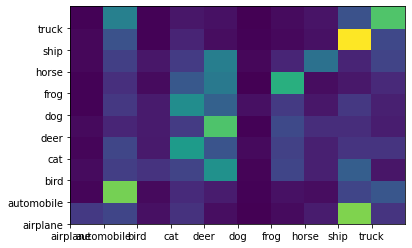

In [ ]:
pred = clf.predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.pcolormesh(cm)

plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.yticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

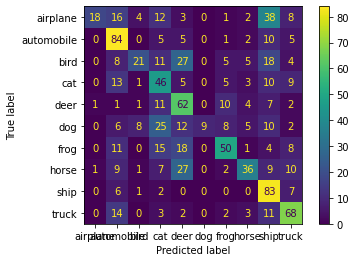

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=class_names)